In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re,glob,os
# from collections import defaultdict
import dgutils
import json

# Notebook display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import dframe_tools as dtools
import plot_tools as ptools
import gen_resubmit as gensub

# Comment out for description of below modules
# dtools.help()
# ptools.help()
# gensub.help()

### If you import data from csv, put 1 here
is_csv = 1


#=========================================================================
if is_csv == 1:

    dbase = pd.read_csv('../data/Largebox_data.csv')
    dbase['filedic'] = dbase['filedic'].apply(lambda x: json.loads(x.replace("'", '"')))
    dbase['boxdims'] = dbase['boxdims'].apply(lambda x: [float(t) for t in x.strip('[').strip(']').split(',')])

else:
### from raw data
    path = '../data/QMC/OUTPUT'
    dbase = dtools.df_pimc(path, skip = 0, noenergy = 1, replace = 1)

dfdict = ptools.datadic(dbase)

dict_keys(['0.15,-93.0'])


In [2]:
##plot style
plot_style = {'notebook':'../include/notebook.mplstyle','sans':'../include/sans_NC.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['sans'])
figsize = plt.rcParams['figure.figsize']

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# setup a possible custom font path
from matplotlib import font_manager
def what_font_path (filename):
    for p in font_manager.findSystemFonts(fontpaths=None, fontext="ttf"):
        if p.find(filename) != -1:
            return p

font_path,bold_font_path = '.','.'
if 'LOCAL_FONT_PATH' in os.environ:
    font_path = os.environ['LOCAL_FONT_PATH'] + os.path.sep + 'HelveticaNeue/HelveticaNeue-Light-08.ttf'
    bold_font_path = os.environ['LOCAL_FONT_PATH'] + os.path.sep + 'HelveticaNeue/HelveticaNeue-Bold-02.ttf'
    
else:
    # local path (custom)
    font_path = what_font_path('HelveticaNeue-Light-08')
    bold_font_path = what_font_path('HelveticaNeue-Bold-02')
    italic_font_path = what_font_path('HelveticaNeue-Italic-03')

In [3]:
### Export data
# dbase.to_csv('../data/Largebox_data.csv',index=False)

In [4]:
# Initialize outputs
case_out = {}
case_nmean = {}
case_nerr = {}
case_alist = {}
case_aerrlist = {}

In [5]:
subset = dbase.sort_values('T',ascending=True)
Tset = subset['T']
nset = subset['n']
nerrset = subset['nerr']
kapset = subset['kap']
rhosset = subset['rhos']
rhoserrset = subset['rhoserr']

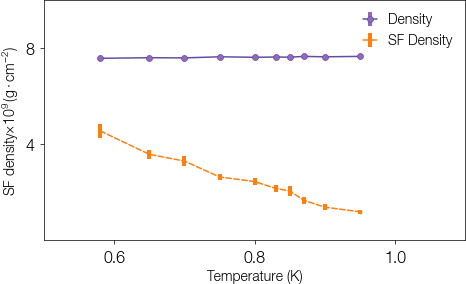

In [8]:
plt.style.reload_library()
# fig1 = plt.figure('fig1' ,figsize = [3.4646*1.2, 2.14122*1.2])
fig1 = plt.figure('fig1' ,)
dgutils.fonts.set_custom_font(font_path)

plt.xlim(0.5, 1.1)
plt.ylim(0, 10)

area = np.sqrt(3)/4*6*1.42
mass = 10*6.7
pden = nset/144/area*mass
sden = nset/144*rhosset/area*mass

# old color was '#92959180', plt.get_cmap('tab10')(0), plt.get_cmap('tab10')(1)
plt.errorbar(Tset, pden, yerr=nerrset/144/area*mass, label = 'Density',
             ms = 6, mfc = '#9467bd',
             fmt='.-', ecolor='#9467bd', elinewidth=2, capsize=0,
            )
# plt.bar(Tset, pden, width=0.015, color = 'lightgrey', )
plt.errorbar(Tset, sden, yerr=nset/144*rhoserrset/area*mass, label = 'SF Density',
             ms = 3, c = '#ff7f0e',
             fmt='.--', ecolor='#ff7f0e', elinewidth=2, capsize=0,
            )
# plt.bar(Tset, rhosset,)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel(r'SF density' +r'$\times 10^{9} \, (\rm{g \cdot cm}^{-2}$)')
plt.xticks([0.6, 0.8, 1.0])
plt.yticks([4, 8, ])
plt.tight_layout()
plt.show()

# save?
fig1.savefig('../figures/largeBox.pdf')

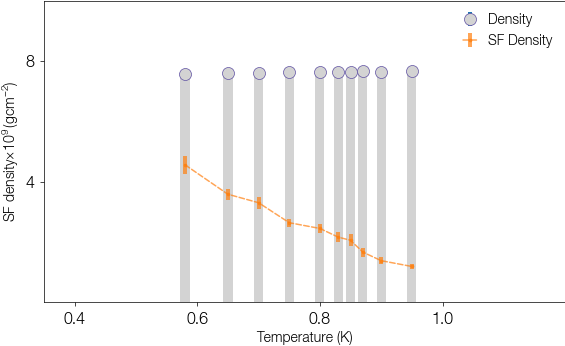

In [7]:
plt.style.reload_library()
with plt.style.context(plot_style['sans']):
    fig1 = plt.figure('fig1' ,figsize = [3.4646*1.2, 2.14122*1.2])
    dgutils.fonts.set_custom_font(font_path)

    plt.xlim(0.35, 1.2)
    plt.ylim(0, 10)

    area = np.sqrt(3)/4*6*1.42
    mass = 10*6.7
    pden = nset/144/area*mass
    sden = nset/144*rhosset/area*mass

    plt.errorbar(Tset, pden, yerr=nerrset/144/area*mass, label = 'Density',
                 ms = 12, mfc = 'lightgrey',
                 fmt='.', ecolor=plt.get_cmap('tab10')(0), elinewidth=2, capsize=0, alpha = 1.0
                )
    plt.bar(Tset, pden, width=0.015, color = 'lightgrey', )
    plt.errorbar(Tset, sden, yerr=nset/144*rhoserrset/area*mass, label = 'SF Density',
                 ms = 3, c = plt.get_cmap('tab10')(1),
                 fmt='.--', ecolor=plt.get_cmap('tab10')(1), elinewidth=2, capsize=0, alpha = 0.7
                )
    # plt.bar(Tset, rhosset,)
    plt.legend()
    plt.xlabel('Temperature (K)')
    plt.ylabel(r'SF density'+r'$\times 10^{9} \, ({\rm g cm}^{-2}$)')
    plt.xticks([0.4, 0.6, 0.8, 1.0])
    plt.yticks([4, 8, ])
    plt.tight_layout()
    plt.show()

    # save?
    # fig1.savefig('../figures/largeBox.pdf')

In [8]:
# target = dbase

In [9]:
# print(len(target))
# date = 'May03'
# gensub.continue_from(target, 'pimc_large_cont', date, suffix = 0)

In [11]:
# from graphenetools import gt
# import matplotlib.patheffects as path_effects
# path_eff = [path_effects.withSimplePatchShadow(offset=(0.06, -0.06), shadow_rgbFace='k', alpha=1.0)]
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [8]:
def den_maker_from_raw(subset):
    if len(subset) != 1:
        print("the subset has more than one data")
        return None
    else:

        mulst = np.array(subset['mu'])

        file = subset.iloc[0]['filedic']['planeavedensity'] #file location
        with open(file,'r') as lines:
            header = lines.readline()
        ngridsep = int(header.split(' ')[-1][:-1])
        densityData = np.genfromtxt(file, skip_header=2,deletechars="") #read data
        rho = densityData.reshape([ngridsep,ngridsep]) #reshape to 2d
        box = [float(header.split(' ')[4])*ngridsep, float(header.split(' ')[7])*ngridsep]
        dens = round(float(one_set['n']/one_set['totN']), 4)

        return mulst, rho, box, ngridsep, dens

(-0.5, 204.5, 204.5, -0.5)

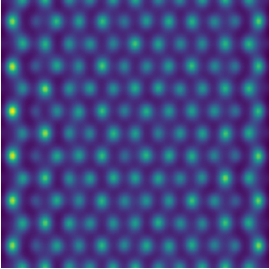

In [10]:
# one_set = dbase[ (dbase['T'] == 0.75) ]
# scale = 1.15
# mulst, rho, box, ngrid, dens = den_maker_from_raw(one_set)

# full_fig = plt.figure('full')
# plt.imshow(rho.T)
# plt.axis('off')
# full_fig.savefig('../figures/N144_full.pdf')

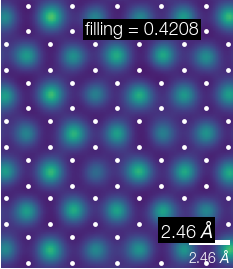

In [11]:
# one_set = dbase[ (dbase['T'] == 0.75) ]
# scale = 1.15
# mulst, rho, box, ngrid, dens = den_maker_from_raw(one_set)


# plt.style.reload_library()
# with plt.style.context(plot_style['sans']):
#     snap_fig, ax = plt.subplots()
#     dgutils.fonts.set_custom_font(font_path)

#     inset = ax.imshow(rho.T*10, extent=[-0.5*box[0],0.5*box[0],-0.5*box[1],0.5*box[1]])
#     plt.axis('off')
#     snap_fig.text(0.55,0.81,'filling = '+f'{dens}', 
#                   c='white', fontsize = 9,
#     #               path_effects=path_eff,?
#                   bbox={'facecolor':'black','alpha':1,'edgecolor':'none','pad':1},ha='center'
#                  )
#     c_positions = np.vstack(gt.get_graphene_carbon_atoms(0.0,[x/(scale) for x in box]))
#     c_positions *= scale
#     ax.scatter(c_positions[:,0],c_positions[:,1], s=2, c='w')
#     fixbox = [14.7570726, 17.03999975]
#     ax.set_xlim(-0.5*fixbox[0],0.5*fixbox[0])
#     ax.set_ylim(-0.5*fixbox[1],0.5*fixbox[1])
#     snap_fig.text(0.64,0.151, '2.46 '+ r'${\rm \AA}$', 
#                   c='white', fontsize = 9,
#     #               path_effects=path_eff,
#                   bbox={'facecolor':'black','alpha':1,'edgecolor':'none','pad':1},ha='center'
#                  ) #family= 'sans-serif',? r'2.46'+ r'$\mathrm{\AA}$'
#     scalebar = AnchoredSizeBar(ax.transData,
#                                2.46, '2.46 '+ r'${\rm \AA}$', 'lower right', 
#                                pad=0.1,
#                                color='white',
#                                frameon=False,
#                                size_vertical=0.2,
#                               )
#     # scalebar.set_path_effects(path_eff)
#     ax.add_artist(scalebar)
    
# snap_fig.savefig('../figures/N144_closeup.pdf')